<a href="https://colab.research.google.com/github/moqri/deep_cell/blob/master/CNNC/naseq2image_cnnc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
folder='dendritic'
expressions_url='https://mousescexpression.s3.amazonaws.com/dendritic_cell.h5'

In [70]:
# Download the data 
!mkdir {folder}
!wget -O {folder}/exprMatrix.h5 {expressions_url}

mkdir: cannot create directory ‘dendritic’: File exists
--2020-02-15 01:18:45--  https://mousescexpression.s3.amazonaws.com/dendritic_cell.h5
Resolving mousescexpression.s3.amazonaws.com (mousescexpression.s3.amazonaws.com)... 52.216.104.243
Connecting to mousescexpression.s3.amazonaws.com (mousescexpression.s3.amazonaws.com)|52.216.104.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 675899084 (645M) [application/x-www-form-urlencoded]
Saving to: ‘dendritic/exprMatrix.h5’

dendritic/exprMatri 100%[===================>] 644.59M  84.3MB/s    in 7.9s    

2020-02-15 01:18:53 (81.8 MB/s) - ‘dendritic/exprMatrix.h5’ saved [675899084/675899084]



In [0]:
import numpy as np
import pandas as pd
import h5py

In [72]:
expression_df = pd.read_hdf(folder+"/exprMatrix.h5",index_col=0)
expression_df.index.rename('cell_id',inplace=1)
expression_df.shape

(4126, 20463)

In [73]:
expression_df.head()

,100009600,100009609,100009614,100012,100017,100019,100033459,100034251,100034361,100034363,100034684,100034729,100036518,100036521,100037258,100037278,100037282,100037283,100038347,100038417,100038489,100038538,100038570,100038657,100038725,100038847,100038854,100038859,100038860,100038862,100038882,100038914,100038927,100038941,100038947,100038948,100038949,100038977,100039008,100039028,...,99138,99151,99152,99167,99237,99296,99311,99326,99334,99349,99371,99375,99377,99382,99412,99439,99470,99480,99512,99526,99543,99571,99586,99633,99650,99662,99663,99681,99683,99696,99709,99712,99730,99738,99887,99889,99890,99899,99929,99982
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSE48968_GSM1189043_SRR935907,0.000000,0.0,0.0,0.0,0.000000,0.021149,0.099963,5550.873212,0.000000,0.0,0.0,0.000000,0.0,9.265009,15.460175,0.0,1.666426,67.126252,0.0,0.0,0.0,0.0,0.0,0.000000,0.292417,0.0,0.0,0.0,0.0,0.0,22.549960,0.850411,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,3.002395,0.199248,9.854028,0.000000,9.381185,0.0,0.000000,0.0,1.478695,4.768447,0.164827,0.389458,0.0,0.000000,0.591914,0.228469,0.199586,10.624149,2.689515,0.00000,0.0,0.266115,0.000000,0.158590,24.345290,0.0,0.382131,0.000000,10.188531,2.338631,0.063689,80.015987,23.724416,0.0,0.0,48.025297,0.0,0.000000,78.227920,0.067654
GSE48968_GSM1189045_SRR935909,0.000000,0.0,0.0,0.0,0.000000,0.028580,0.180114,8742.533195,4.106672,0.0,0.0,0.000000,0.0,0.000000,8.441251,0.0,41.217021,12.135940,0.0,0.0,0.0,0.0,0.0,0.000000,4.346736,0.0,0.0,0.0,0.0,0.0,5.242644,0.000000,0.0,0.0,1.218881,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.497147,0.0,0.000000,0.0,0.000000,0.000000,2.019498,1.684142,0.0,1.659542,0.639906,0.000000,0.000000,0.000000,3.922925,0.00000,0.0,0.000000,0.103823,12.430027,21.370283,0.0,0.573770,0.000000,37.352788,1.915338,0.000000,0.000000,0.000000,0.0,0.0,7.003484,0.0,0.125666,27.948567,0.000000
GSE48968_GSM1189047_SRR935911,0.000000,0.0,0.0,0.0,0.000000,0.184533,0.000000,10373.409195,0.701884,0.0,0.0,0.000000,0.0,14.628159,3.474553,0.0,2.379279,17.132591,0.0,0.0,0.0,0.0,0.0,0.000000,1.275712,0.0,0.0,0.0,0.0,0.0,0.634693,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,9.561700,0.982619,0.000000,0.000000,0.0,8.822728,0.0,0.000000,3.467171,0.805371,8.427373,0.0,22.602372,0.929631,0.000000,0.139316,1.353266,0.000000,0.76918,0.0,0.000000,0.000000,0.000000,1.089331,0.0,0.000000,0.448174,5.679583,0.000000,0.000000,0.000000,0.000000,0.0,0.0,51.248802,0.0,0.000000,6.552583,0.000000
GSE48968_GSM1189048_SRR935912,0.000000,0.0,0.0,0.0,1.102037,0.334246,0.000000,10735.189490,20.033072,0.0,0.0,2.343637,0.0,10.142056,30.962625,0.0,2.176571,20.338375,0.0,0.0,0.0,0.0,0.0,1.181858,1.470451,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,3.023779,0.0,0.0,0.0,0.0,0.0,...,3.632568,1.145071,1.820278,0.000000,2.378535,0.0,34.338673,0.0,0.000000,0.000000,0.757805,9.624295,0.0,4.962411,0.000000,0.000000,0.917615,2.228348,5.152194,0.00000,0.0,0.000000,0.331152,0.455707,23.318638,0.0,1.098050,0.000000,5.150518,16.494622,0.000000,17.091772,0.000000,0.0,0.0,3.971227,0.0,0.000000,14.643270,1.166414
GSE48968_GSM1189049_SRR935913,5.884803,0.0,0.0,0.0,0.000000,0.000000,0.156472,5089.802416,114.583994,0.0,0.0,0.000000,0.0,4.143567,1.833315,0.0,2.608450,20.371195,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,26.188372,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.155941,0.330524,1.804894,5.182706,0.0,0.000000,0.0,0.000000,0.000000,2.580030,0.121924,0.0,0.180214,1.019173,0.000000,0.000000,35.566227,0.000000,0.00000,0.0,0.000000,0.000000,0.124120,0.000000,0.0,0.996915,0.000000,19.122918,2.662292,0.000000,0.000000,0.000000,0.0,0.0,29.745039,0.0,0.218342,4.058339,0.000000


In [74]:
expression_df=expression_df.loc[:, (expression_df != expression_df.iloc[0]).any()]  # remove constant columns
expression_df.shape

(4126, 20446)

In [75]:
expression_df=expression_df[(expression_df.T != 0).any()] # remove rows of zeros
expression_df.shape

(4124, 20446)

In [76]:
# drop low count genes
gene_count=expression_df.astype(bool).sum(axis=0)
cells=expression_df.count()
expression_df=expression_df[gene_count[gene_count>cells/10].index]
expression_df.shape

(4124, 13028)

In [77]:
expression_df.head()

,100009600,100017,100019,100033459,100034251,100034361,100034729,100036521,100037258,100037278,100037282,100037283,100038347,100038538,100038725,100038882,100038947,100039030,100039060,100039065,100039120,100039123,100039139,100039192,100039240,100039257,100039324,100039377,100039467,100039550,100039585,100039707,100039796,100039863,100039890,100039934,100039968,100040016,100040048,100040462,...,98999,99003,99010,99011,99031,99045,99100,99138,99151,99152,99237,99311,99326,99334,99349,99371,99375,99377,99382,99412,99439,99470,99480,99512,99526,99586,99633,99650,99663,99683,99696,99709,99712,99730,99887,99889,99890,99899,99929,99982
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSE48968_GSM1189043_SRR935907,0.000000,0.000000,0.021149,0.099963,5550.873212,0.000000,0.000000,9.265009,15.460175,0.0,1.666426,67.126252,0.0,0.0,0.292417,22.549960,0.000000,0.000000,0.117907,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,34.975789,0.0,0.871461,0.000000,0.000000,5.085460,0.0,0.000000,79.757389,...,0.337340,0.000000,0.0,0.000000,0.000000,0.000000,0.0,3.002395,0.199248,9.854028,9.381185,0.000000,0.0,1.478695,4.768447,0.164827,0.389458,0.0,0.000000,0.591914,0.228469,0.199586,10.624149,2.689515,0.00000,0.000000,0.158590,24.345290,0.382131,10.188531,2.338631,0.063689,80.015987,23.724416,0.0,48.025297,0.0,0.000000,78.227920,0.067654
GSE48968_GSM1189045_SRR935909,0.000000,0.000000,0.028580,0.180114,8742.533195,4.106672,0.000000,0.000000,8.441251,0.0,41.217021,12.135940,0.0,0.0,4.346736,5.242644,1.218881,0.000000,20.925806,0.000000,0.000000,17.345781,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.0,1.570198,0.000000,0.000000,20.440488,0.0,3.524222,94.326057,...,29.377898,0.436458,0.0,0.714048,0.114754,0.000000,0.0,0.000000,0.000000,0.000000,0.497147,0.000000,0.0,0.000000,0.000000,2.019498,1.684142,0.0,1.659542,0.639906,0.000000,0.000000,0.000000,3.922925,0.00000,0.103823,12.430027,21.370283,0.573770,37.352788,1.915338,0.000000,0.000000,0.000000,0.0,7.003484,0.0,0.125666,27.948567,0.000000
GSE48968_GSM1189047_SRR935911,0.000000,0.000000,0.184533,0.000000,10373.409195,0.701884,0.000000,14.628159,3.474553,0.0,2.379279,17.132591,0.0,0.0,1.275712,0.634693,0.000000,0.000000,1.028772,0.000000,0.000000,3.199910,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,6.826474,0.0,0.000000,22.337718,...,0.784903,0.000000,0.0,2.904556,0.000000,2.564202,0.0,0.000000,9.561700,0.982619,0.000000,8.822728,0.0,0.000000,3.467171,0.805371,8.427373,0.0,22.602372,0.929631,0.000000,0.139316,1.353266,0.000000,0.76918,0.000000,0.000000,1.089331,0.000000,5.679583,0.000000,0.000000,0.000000,0.000000,0.0,51.248802,0.0,0.000000,6.552583,0.000000
GSE48968_GSM1189048_SRR935912,0.000000,1.102037,0.334246,0.000000,10735.189490,20.033072,2.343637,10.142056,30.962625,0.0,2.176571,20.338375,0.0,0.0,1.470451,0.000000,3.023779,7.214763,3.049240,8.016403,2.404921,5.269115,0.0,5.498207,0.80164,5.498207,3.206561,5.611482,0.0,0.80164,0.80164,1.661199,0.0,0.000000,3.013165,3.013165,0.000000,0.0,0.000000,43.384238,...,0.161557,0.000000,0.0,2.960764,0.000000,31.245237,0.0,3.632568,1.145071,1.820278,2.378535,34.338673,0.0,0.000000,0.000000,0.757805,9.624295,0.0,4.962411,0.000000,0.000000,0.917615,2.228348,5.152194,0.00000,0.331152,0.455707,23.318638,1.098050,5.150518,16.494622,0.000000,17.091772,0.000000,0.0,3.971227,0.0,0.000000,14.643270,1.166414
GSE48968_GSM1189049_SRR935913,5.884803,0.000000,0.000000,0.156472,5089.802416,114.583994,0.000000,4.143567,1.833315,0.0,2.608450,20.371195,0.0,0.0,0.000000,26.188372,0.000000,0.000000,0.184559,0.000000,0.000000,0.000000,0.0,20.965550,0.00000,15.724162,0.000000,0.000000,0.0,0.00000,0.00000,3.619668,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,35.963280,...,19.801381,0.000000,0.0,18.733737,0.000000,0.000000,0.0,0.000000,0.155941,0.330524,5.182706,0.000000,0.0,0.000000,

In [78]:
# get expression as percentage
expression_df=(100*expression_df.transpose() / expression_df.sum(1)).round(2).transpose()
expression_df

,100009600,100017,100019,100033459,100034251,100034361,100034729,100036521,100037258,100037278,100037282,100037283,100038347,100038538,100038725,100038882,100038947,100039030,100039060,100039065,100039120,100039123,100039139,100039192,100039240,100039257,100039324,100039377,100039467,100039550,100039585,100039707,100039796,100039863,100039890,100039934,100039968,100040016,100040048,100040462,...,98999,99003,99010,99011,99031,99045,99100,99138,99151,99152,99237,99311,99326,99334,99349,99371,99375,99377,99382,99412,99439,99470,99480,99512,99526,99586,99633,99650,99663,99683,99696,99709,99712,99730,99887,99889,99890,99899,99929,99982
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSE48968_GSM1189043_SRR935907,0.0,0.0,0.0,0.0,0.70,0.00,0.0,0.00,0.00,0.0,0.00,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.01,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.01,0.00,0.00,0.01,0.0,0.0,0.01,0.0
GSE48968_GSM1189045_SRR935909,0.0,0.0,0.0,0.0,1.94,0.00,0.0,0.00,0.00,0.0,0.01,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.02,...,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.01,0.0
GSE48968_GSM1189047_SRR935911,0.0,0.0,0.0,0.0,2.49,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.01,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.01,0.0,0.0,0.00,0.0
GSE48968_GSM1189048_SRR935912,0.0,0.0,0.0,0.0,3.04,0.01,0.0,0.00,0.01,0.0,0.00,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.01,...,0.00,0.0,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0
GSE48968_GSM1189049_SRR935913,0.0,0.0,0.0,0.0,1.36,0.03,0.0,0.00,0.00,0.0,0.00,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.01,...,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.00,0.00,0.00,0.01,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSE78779_GSM2076658_SRR3196081,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.00,0.01,0.0,0.07,0.02,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.02,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0
GSE78779_GSM2076659_SRR3196082,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.01,0.0,0.04,0.04,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.02,0.0,0.0,0.0,0.0,0.02,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.01,0.00,0.00,0.00,0.0,0.0,0.00,0.0
GSE78779_GSM2076660_SRR3196083,0.0,0.0,0.0,0.0,0.04,0.00,0.0,0.01,0.01,0.0,0.06,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.02,0.0,0.0,0.0,0.0,0.02,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.01,0.0,0.01,0.0,0.

In [79]:
# most expressed genes
gene_sum=expression_df.sum()
top_genes=gene_sum.sort_values().tail(10)
top_genes

100034251     4761.55
67945         5190.78
20305         6892.35
20304         7007.11
14325         7628.25
11461         8387.60
14319         9244.72
20128        13524.26
17105        14274.70
19241        19459.65
dtype: float64

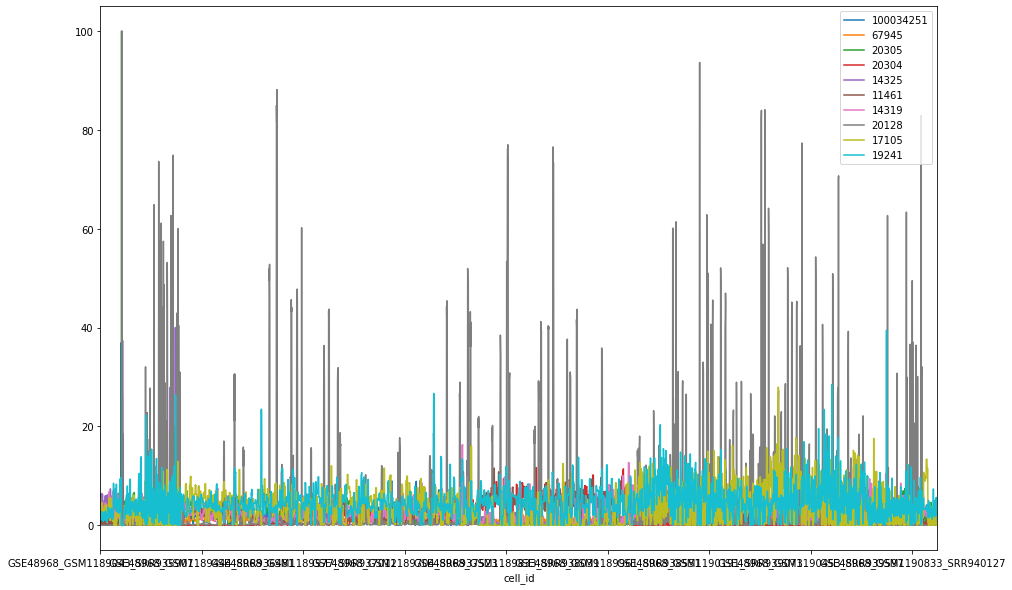

In [80]:
expression_df_top=expression_df[top_genes.index]
expression_df_top.plot(figsize=(15,10))

In [81]:
corr=expression_df_top.corr()
corr

,100034251,67945,20305,20304,14325,11461,14319,20128,17105,19241
100034251,1.000000,0.075368,0.354651,-0.250491,0.205864,-0.277634,0.220123,-0.088838,0.406415,-0.099177
67945,0.075368,1.000000,0.050922,-0.065963,0.093397,0.020159,0.026499,-0.138478,-0.058914,0.377843
20305,0.354651,0.050922,1.000000,-0.262299,0.279197,-0.194066,0.162891,-0.121827,0.316014,-0.142257
20304,-0.250491,-0.065963,-0.262299,1.000000,-0.195602,0.553508,-0.034163,-0.171413,-0.339134,0.112072
14325,0.205864,0.093397,0.279197,-0.195602,1.000000,-0.141953,0.471374,-0.150338,0.243668,-0.115108
11461,-0.277634,0.020159,-0.194066,0.553508,-0.141953,1.000000,-0.175177,-0.171327,-0.346440,0.290385
14319,0.220123,0.026499,0.162891,-0.034163,0.471374,-0.175177,1.000000,-0.110665,0.386739,-0.168136
20128,-0.088838,-0.138478,-0.121827,-0.171413,-0.150338,-0.171327,-0.110665,1.000000,-0.138163,-0.211044
17105,0.406415,-0.058914,0.316014,-0.339134,0.243668,-0.346440,0.386739,-0.138163,1.000000,-0.179657
19241,-0.099177,0.377843,-0.142257,0.112072,-0.115108,0.290385,-0.168136,-0.211044,-0.179657,1.000000


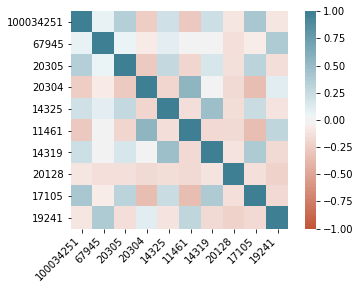

In [82]:
import seaborn as sns
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
gene_a=67945
gene_b=19241

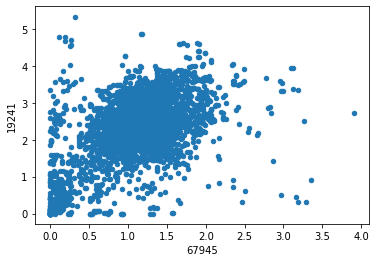

In [84]:
np.log2(expression_df_top+1).plot.scatter(gene_a,gene_b)

In [0]:
d=expression_df_top[[gene_a,gene_b]]
d=d[d[gene_a]*d[gene_b]>1]

In [0]:
x=np.log2(d+1)[gene_a].values
y=np.log2(d+1)[gene_b].values

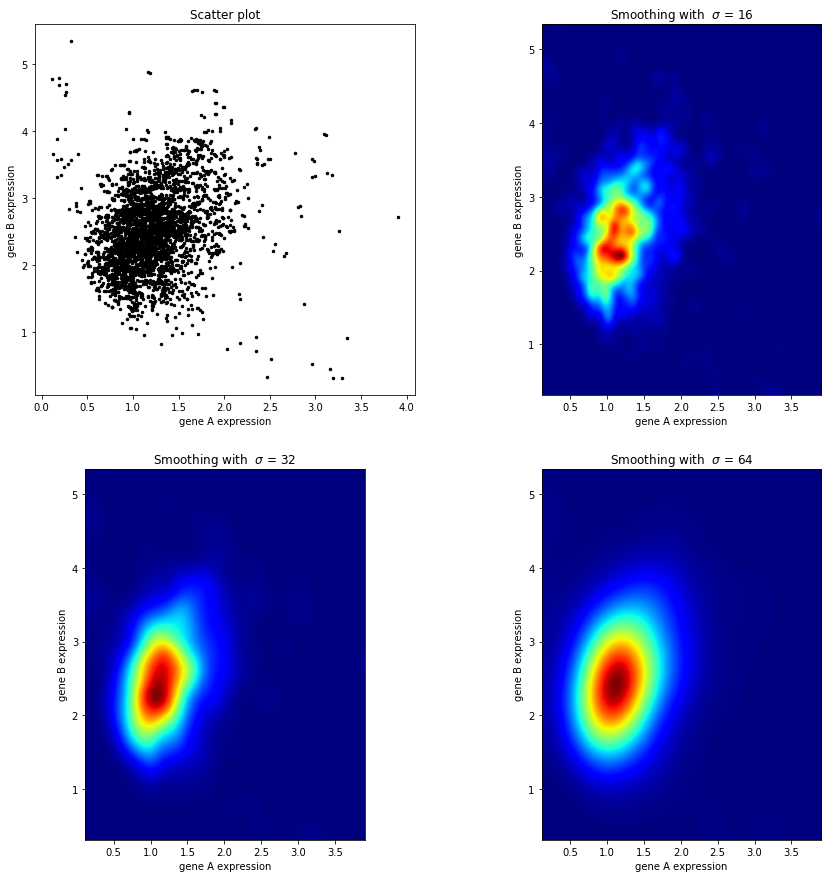

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter


def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2, 2,figsize=(15,15))


# Generate some test data

sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    ax.set(xlabel='gene A expression', ylabel='gene B expression')
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(x, y, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()